# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 10</span>
------------------------------------------------------------------------------------------------------------------------------

# <span style="color:red"> Introduction </span>

In this notebook we study some basic aspects of **Machine Learning (ML)**.  We will focus on what is called **Supervised Learning (SL)**. We want to perform some **regressions** on noisy data with a **Neural Network (NN)**, in order to explore:

  - how the ability to fit depends on the structure of the NN
  - how a regression depends on certain parameters, such as the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$
  - why prediction is difficult

Below there is a list of the packages that will be used during this notebook:

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics
from mpl_toolkits import mplot3d

# <span style="color:red"> Theoretical recals </span>

ML is a subfield of Artificial Intelligence (AI) with the goal of developing algorithms capable of learning from data automatically. We talk about SL when each data is tagged with a label and the goal is to approximate a mapping function so well that when we have new input data (x) that we can predict the output variables (Y) for that data.

------------------------------------------------------------------------------------------------------------------------------

We we apply SL we deal with:

  - a **dataset** $D = ( X; Y )$, where X is a set of independent variables and Y is a set of dependent variables
  - a **model** $f( X; p): \, x → y$, where $p$ are some parameters
  - a **cost function** $C\left[y; f(X;p)\right]$

The model is fit by finding the value of p that minimizes the cost function 

------------------------------------------------------------------------------------------------------------------------------

The typical way to proceed is as follows:

  1)  We randomly divide the dataset $D$ into two mutually exclusive groups $D_{train}$ ($\approx  90\%$ of the total dataset) and $D_{test}$

  2)  First the model is fit by minimizing the cost function using only the data in the training set $D_{train}$

  3)  Then the performance of the fitted model is evaluated by computing the 
cost function using the test set $D_{test}$

We define **in-sample (or training) error** the value of the cost function for the best fit model on the training set
$$E_{in} = C\left[Y_{train};f(X_{train};p)\right]$$

We call **out-of-sample error** the value of the cost function on the test set
$$E_{out} = C\left[Y_{test};f(X_{test};p)\right]$$

In general, $E_{out} \geq E_{in}$ because the test data was now used in the 
fitting procedure.

This way of proceeding is called **cross-validation**: splitting the data into mutually exclusive training and test sets provides an unbiased estimate for the predictive performance of the model.

------------------------------------------------------------------------------------------------------------------------------

In order to represent our models, we will create **Deep Neural Networks (DNNs)**, thanks to the <font face = "Courier"> `tensorflow` </font> library. DNNs contain multiple hidden **layers**; each layer is composed by sigmoid (or similar non-linear activation functions) **neurons**. These neurons have inputs, $x_1, x_2, ...$ with weights $w_1, w_2, ...$. Their non-linear activation function guarantees that small changes in their weights and 
bias cause only a small change in their output. This property allows us to fine-tune the output of our network, so that we can best fit any continuous function with arbitrary accuracy.

# <span style="color:red"> Exercise 11.1 </span>

We want to perform a linear regression of the function

$$f(x) = 2x + 1$$

in order to explore how the result depends on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

The response of a single neuron to inputs is linear: in fact, a neuron takes an input $x$ and multiplies it by a weight $w$ (which will be optimized to approximate the angular coefficient $m$) and adds a bias (which will be optimized to approximate the known term $b$). Therefore, to fit a line, it is not necessary to set any activation function.

Then we will create a Sequential model with just one layer on one neuron. We begin by constructing our dataset for different models:

In [146]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [147]:
N_train = [50, 500, 5000]
N_epochs = [30, 100, 500]
np.random.seed(0) #fisso il seme per riproducibilità

In [148]:
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b

### <span style="color:red"> Model 0: $N_{train} = 50$, $N_{epochs} = 30$ </span>

In [149]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[0])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 0:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 0:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 0.2183459848165512
Test accuracy: 0.2183459848165512
|$\sigma = 0.5$|
Test loss: 1.016882061958313
Test accuracy: 1.016882061958313
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 0.2183459848165512
Test accuracy: 0.2183459848165512
|$\sigma = 0.5$|
Test loss: 0.8419856429100037
Test accuracy: 0.8419856429100037
-----------------------------------------------------------------------
CPU times: user 2.65 s, sys: 67.5 ms, total: 2.72 s
Wall time: 2.66 s


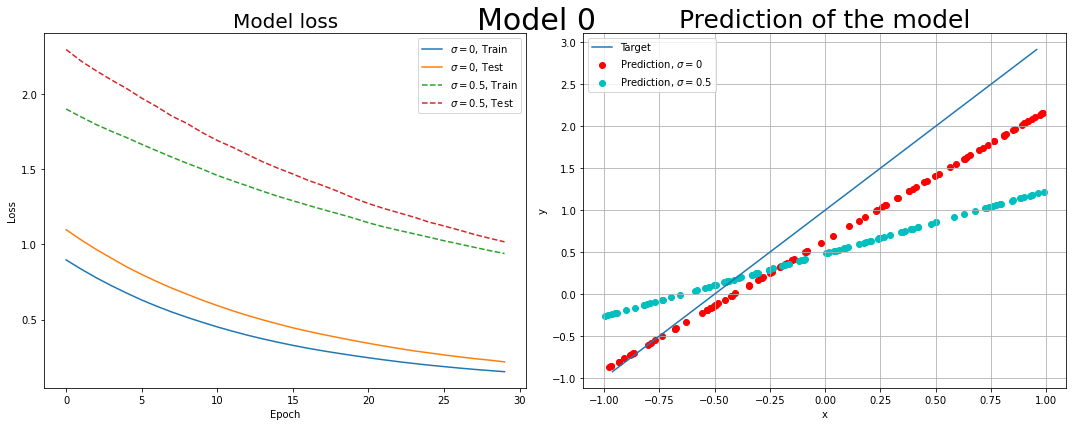

In [150]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 0',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 1: $N_{train} = 50$, $N_{epochs} = 100$ </span>

In [151]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[0])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 1:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 1:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 0.08189207315444946
Test accuracy: 0.08189207315444946
|$\sigma = 0.5$|
Test loss: 0.35702216625213623
Test accuracy: 0.35702216625213623
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 0.08189207315444946
Test accuracy: 0.08189207315444946
|$\sigma = 0.5$|
Test loss: 0.26220864057540894
Test accuracy: 0.26220864057540894
-----------------------------------------------------------------------
CPU times: user 5.76 s, sys: 180 ms, total: 5.94 s
Wall time: 5.71 s


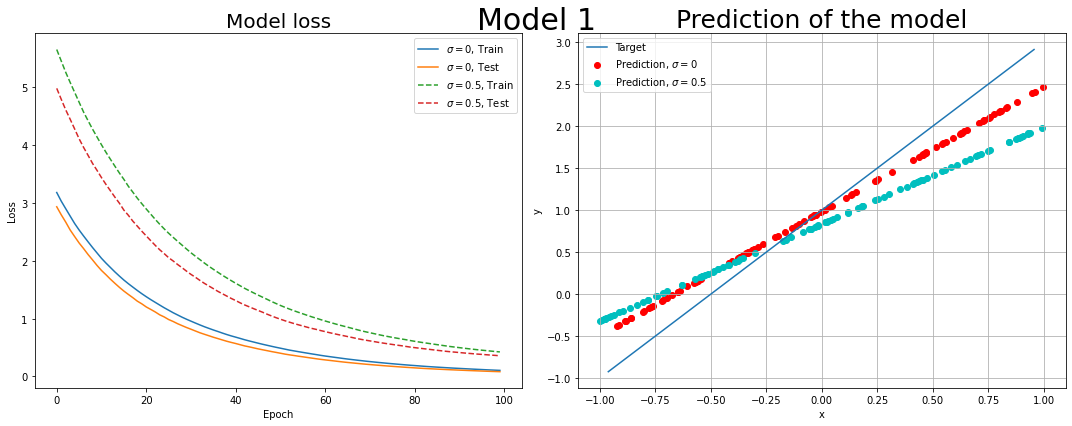

In [152]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 1',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 2: $N_{train} = 50$, $N_{epochs} = 500$ </span>

In [153]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[0])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 2:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 2:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 2.9881445584578614e-07
Test accuracy: 2.9881445584578614e-07
|$\sigma = 0.5$|
Test loss: 0.25442370772361755
Test accuracy: 0.25442370772361755
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 2.9881445584578614e-07
Test accuracy: 2.9881445584578614e-07
|$\sigma = 0.5$|
Test loss: 0.008947581052780151
Test accuracy: 0.008947580121457577
-----------------------------------------------------------------------
CPU times: user 24.8 s, sys: 1.01 s, total: 25.8 s
Wall time: 24.8 s


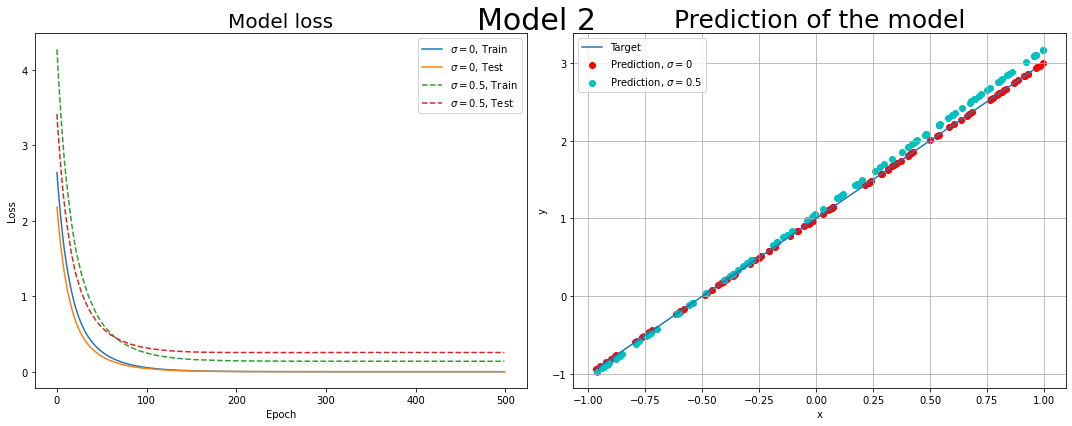

In [154]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 2',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 3: $N_{train} = 500$, $N_{epochs} = 30$ </span>

In [155]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[1])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 3:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 3:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 0.000397824274841696
Test accuracy: 0.000397824274841696
|$\sigma = 0.5$|
Test loss: 0.2054826021194458
Test accuracy: 0.2054826021194458
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 0.000397824274841696
Test accuracy: 0.000397824274841696
|$\sigma = 0.5$|
Test loss: 0.0012627261457964778
Test accuracy: 0.0012627261457964778
-----------------------------------------------------------------------
CPU times: user 3.65 s, sys: 153 ms, total: 3.81 s
Wall time: 3.5 s


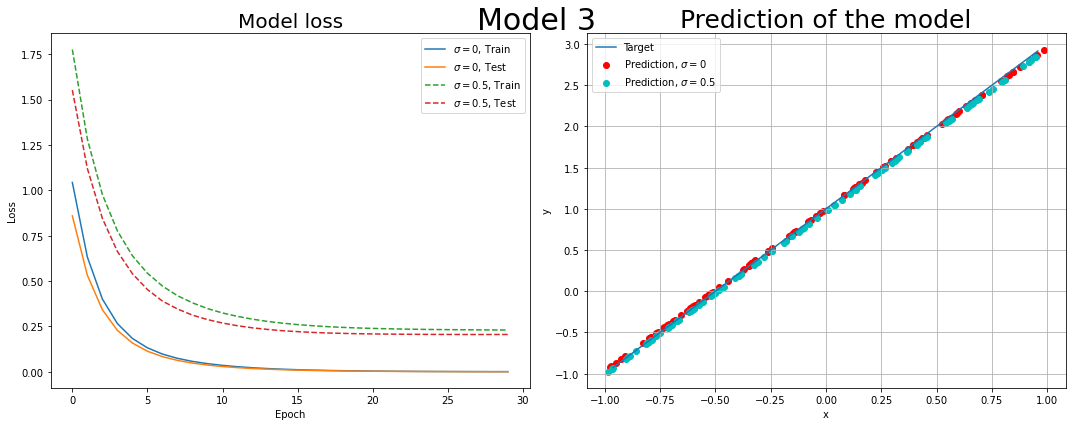

In [156]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 3',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 4: $N_{train} = 500$, $N_{epochs} = 100$ </span>

In [157]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[1])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 4:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 4:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 4.947064424776215e-10
Test accuracy: 4.947064424776215e-10
|$\sigma = 0.5$|
Test loss: 0.27876678109169006
Test accuracy: 0.27876678109169006
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 4.947064424776215e-10
Test accuracy: 4.947064424776215e-10
|$\sigma = 0.5$|
Test loss: 0.002903020940721035
Test accuracy: 0.002903020940721035
-----------------------------------------------------------------------
CPU times: user 9.56 s, sys: 422 ms, total: 9.98 s
Wall time: 9.94 s


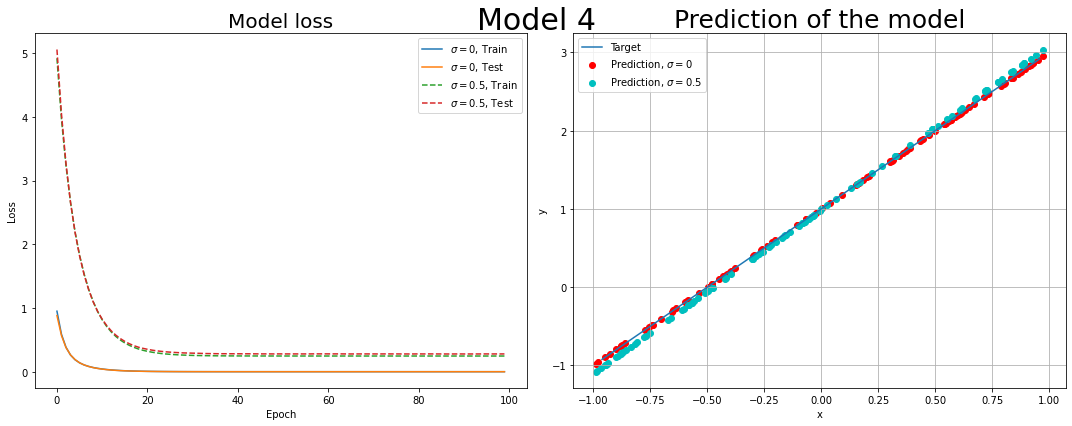

In [158]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 4',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 5: $N_{train} = 500$, $N_{epochs} = 500$ </span>

In [159]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[1])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 5:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 5:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 9.586935412198017e-12
Test accuracy: 9.586935412198017e-12
|$\sigma = 0.5$|
Test loss: 0.27722328901290894
Test accuracy: 0.27722328901290894
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 9.586935412198017e-12
Test accuracy: 9.586935412198017e-12
|$\sigma = 0.5$|
Test loss: 0.0008893866324797273
Test accuracy: 0.0008893866324797273
-----------------------------------------------------------------------
CPU times: user 40.9 s, sys: 2.21 s, total: 43.1 s
Wall time: 37.8 s


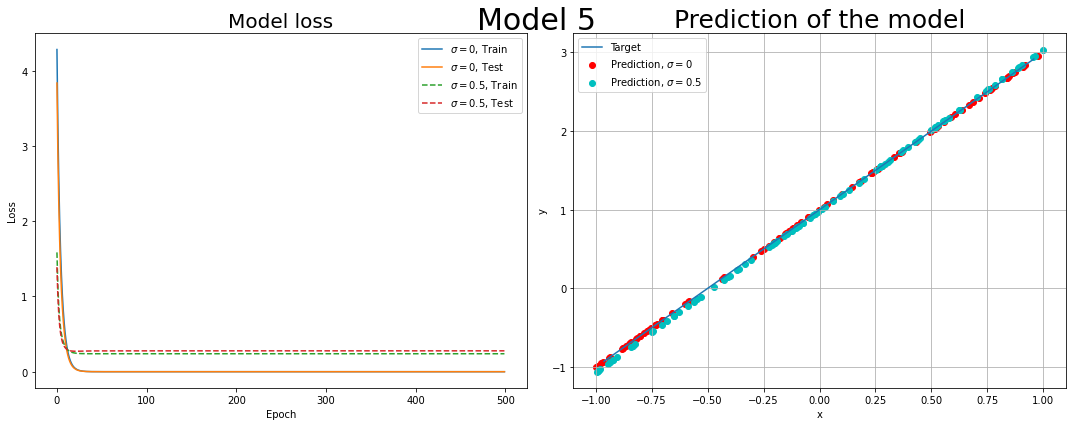

In [160]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 5',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 6: $N_{train} = 5000$, $N_{epochs} = 30$ </span>

In [161]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[2])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[0],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 6:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 6:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 9.921005857116416e-12
Test accuracy: 9.921005857116416e-12
|$\sigma = 0.5$|
Test loss: 0.27656394243240356
Test accuracy: 0.27656394243240356
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 9.921005857116416e-12
Test accuracy: 9.921005857116416e-12
|$\sigma = 0.5$|
Test loss: 0.00022770912619307637
Test accuracy: 0.00022770912619307637
-----------------------------------------------------------------------
CPU times: user 13.8 s, sys: 945 ms, total: 14.7 s
Wall time: 17.3 s


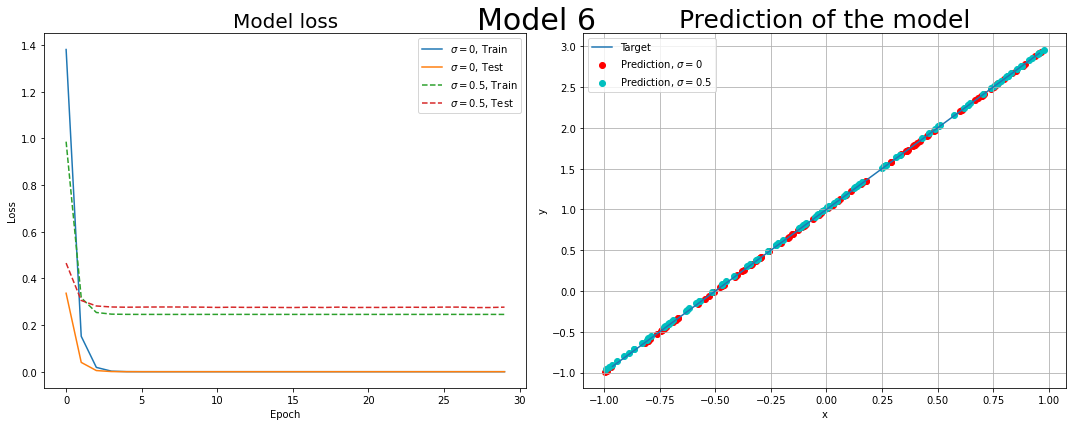

In [162]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 6',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 7: $N_{train} = 5000$, $N_{epochs} = 100$ </span>

In [163]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[2])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[1],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 7:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 7:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 8.207497181889067e-12
Test accuracy: 8.207497181889067e-12
|$\sigma = 0.5$|
Test loss: 0.2905009388923645
Test accuracy: 0.2905009388923645
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 8.207497181889067e-12
Test accuracy: 8.207497181889067e-12
|$\sigma = 0.5$|
Test loss: 0.00010381187166785821
Test accuracy: 0.00010381187166785821
-----------------------------------------------------------------------
CPU times: user 41.6 s, sys: 2.91 s, total: 44.5 s
Wall time: 36.9 s


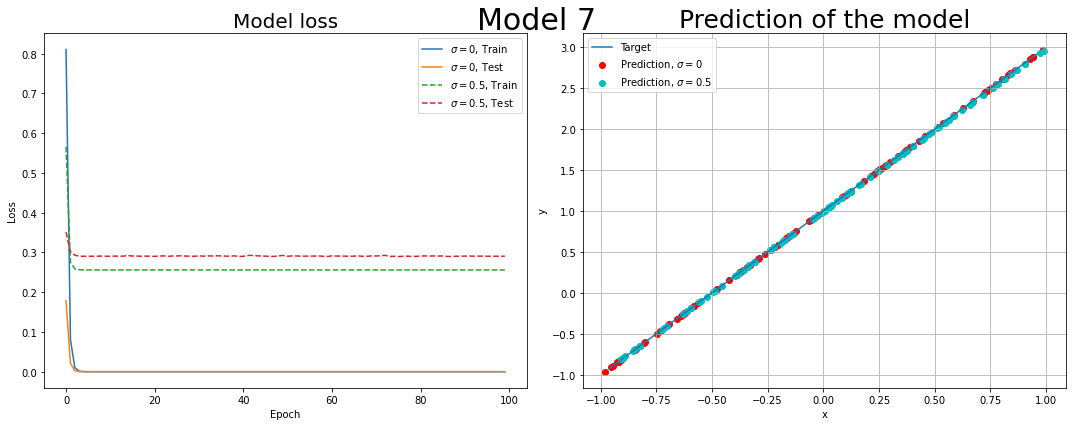

In [164]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 7',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

### <span style="color:red"> Model 8: $N_{train} = 5000$, $N_{epochs} = 500$ </span>

In [165]:
%%time
sigma0 = 0.0
sigma1 = 0.5
#--------------------------
x_train = np.random.uniform(-1, 1, N_train[2])
y_train0 = np.random.normal(m * x_train + b, sigma0)
y_valid0 = np.random.normal(m * x_valid + b, sigma0)
y_train1 = np.random.normal(m * x_train + b, sigma1)
y_valid1 = np.random.normal(m * x_valid + b, sigma1)
#--------------------------
model0 = tf.keras.Sequential()
model0.add(Dense(1, input_shape=(1,)))
model0.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#--------------------------
history0 = model0.fit(x=x_train, y=y_train0, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid0), verbose=0)

history1 = model1.fit(x=x_train, y=y_train1, 
          batch_size=32, epochs=N_epochs[2],
          shuffle=True, 
          validation_data=(x_valid, y_valid1), verbose=0)
#--------------------------
print( "----------------------------------- Model 8:") 
score0a = model0.evaluate(x_valid, y_valid0, batch_size=32, verbose=0)
score1a = model1.evaluate(x_valid, y_valid1, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the test dataset:")
print("|$\sigma = 0$|")
print('Test loss:', score0a[0])
print('Test accuracy:', score0a[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1a[0])
print('Test accuracy:', score1a[1])
score0b = model0.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score1b = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print("   ===> Evaluation of the model with the exact curve:")
print("|$\sigma = 0$|")
print('Test loss:', score0b[0])
print('Test accuracy:', score0b[1])
print("|$\sigma = 0.5$|")
print('Test loss:', score1b[0])
print('Test accuracy:', score1b[1])
print('-----------------------------------------------------------------------')
x_predicted0 = np.random.uniform(-1, 1, 100)
y_predicted0 = model0.predict(x_predicted0)
x_predicted1 = np.random.uniform(-1, 1, 100)
y_predicted1 = model1.predict(x_predicted1)

----------------------------------- Model 8:
   ===> Evaluation of the model with the test dataset:
|$\sigma = 0$|
Test loss: 6.724203225477732e-12
Test accuracy: 6.724203225477732e-12
|$\sigma = 0.5$|
Test loss: 0.211503803730011
Test accuracy: 0.211503803730011
   ===> Evaluation of the model with the exact curve:
|$\sigma = 0$|
Test loss: 6.724203225477732e-12
Test accuracy: 6.724203225477732e-12
|$\sigma = 0.5$|
Test loss: 0.0002563263988122344
Test accuracy: 0.0002563263988122344
-----------------------------------------------------------------------
CPU times: user 3min 21s, sys: 15.2 s, total: 3min 36s
Wall time: 2min 57s


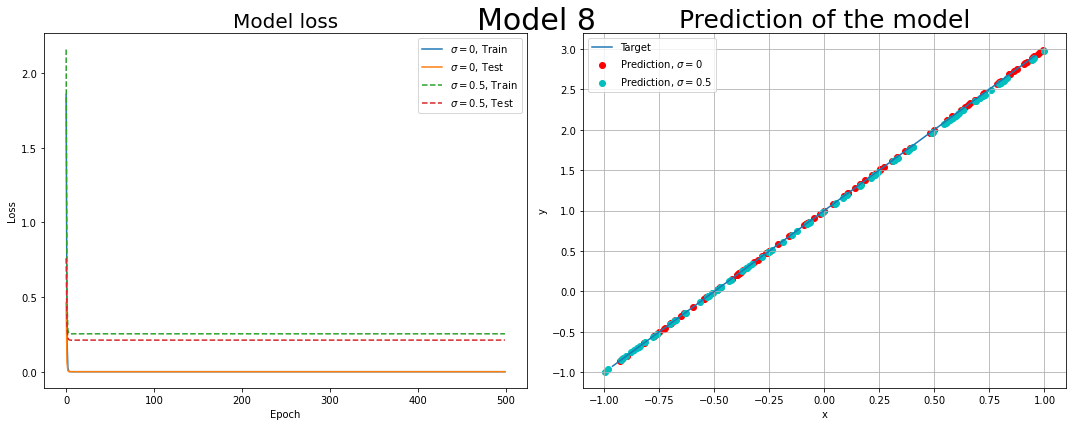

In [166]:
plt.figure(figsize=(15,6))
plt.suptitle('Model 8',fontsize=30)

plt.subplot(1,2,1)
plt.title("Model loss", fontsize=20)
plt.plot(history0.history['loss'], label='$\sigma=0$, Train')
plt.plot(history0.history['val_loss'], label='$\sigma=0$, Test')
plt.plot(history1.history['loss'],'--', label='$\sigma=0.5$, Train')
plt.plot(history1.history['val_loss'],'--',label='$\sigma=0.5$, Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title('Prediction of the model',fontsize=25)
plt.scatter(x_predicted0, y_predicted0,color='r',label='Prediction, $\sigma=0$')
plt.scatter(x_predicted1, y_predicted1,color='c',label='Prediction, $\sigma=0.5$')
plt.plot(x_valid, y_target, label='Target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()      
plt.grid(True)

plt.tight_layout()
plt.show()

From this study we can draw the following conclusions:

  - In all models when $\sigma \neq 0$ the optimal value of the cost function $E_{out}$ found at the last epoch is always greater than that found when $\sigma = 0$. So, if we train a model on data subject to noise, it is useful to allow for longer training times and to increase the number of data available
  - $N_{train} = 50$ are too few; the optimal condition is $N_{train}\approx 80\%-90\%N_{test}$. However, with a very large number of epochs, as in Model 2, a satisfactory result is obtained in the case $\sigma=0$.
So, increasing the number of epochs can compensate for the small number of training data. In fact, by increasing the number of epochs we prolong the training time of the model by performing a more insistent search for the minimum in the parameter space

- In models with $N_{train} \geq 500$ it is observed that after about 30 epochs the optimization does not improve, but remains approximately constant. Therefore, considering also that for certain more complex problems the execution time of the program becomes considerable, it is not necessary to train the machine for an excessive number of epochs

- If we compare models 1, 4 and 7, we observe that for the same number of epochs, increasing $N_{train}$ improves accuracy. In fact, these models, which are based on a training period, become more and more accurate as the sample richness increases. At each epoch we shuffle the training data to help optimize the parameters

# <span style="color:red"> Exercise 11.2 </span>

We now want to fit the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

We need to introduce more than one neuron and we have to choose some non-linear activation function.

In [167]:
# target parameters of f(x) = m1*x + m2*x*x + m3*x*x*x + b
m1 = -3
m2 = -2
m3 = 3
b = 4 # intersect

def f(x):
  return m1 * x + m2 * x * x + m3 * x * x * x + b

In [168]:
# generate training inputs
np.random.seed(0) #fisso il seme per riproducibilità
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m1 * x_valid + m2 * x_valid * x_valid + m3 * x_valid * x_valid * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m1 * x_train + m2 * x_train * x_train + m3 * x_train * x_train * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m1 * x_valid + m2 * x_valid * x_valid + m3 * x_valid * x_valid * x_valid + b, sigma)

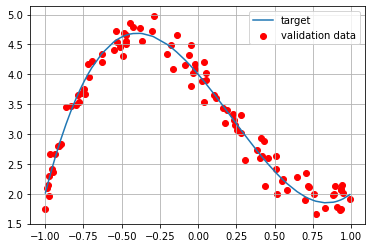

In [169]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Given the shape of the target function, we try a first model with layers of at least 4 neurons, to approximate the concavity change.

In [170]:
#------------------------------ Model 1:  ADAM
Model1 = tf.keras.Sequential()
Model1.add(Dense( 32 , input_shape=(1,) , activation= "tanh" ))
Model1.add(Dense( 16, activation= "tanh" ))
Model1.add(Dense( 8, activation= "tanh" ))
Model1.add(Dense( 1 ))
Model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])
#------------------------------ Model 2:  ADAMAX
Model2 = tf.keras.Sequential()
Model2.add(Dense( 500 , input_shape=(1,) , activation= "tanh" ))
Model2.add(Dense( 32 , activation= "tanh" ))
Model2.add(Dense( 16 , activation= "tanh" ))
Model2.add(Dense( 8 , activation= "tanh" ))
Model2.add(Dense( 1 ))
Model2.compile(optimizer=tf.keras.optimizers.Adamax(), loss="mse", metrics=['mse'])
#------------------------------ Model 3:  SGD
Model3 = tf.keras.Sequential()
Model3.add(Dense( 32 , input_shape=(1,) , activation= "relu" ))
Model3.add(Dense( 16 ,  activation= "relu" ))
Model3.add(Dense( 8 ,  activation= "relu" ))
Model3.add(Dense( 1 ))
Model3.compile(optimizer="sgd", loss='mse', metrics=['mse'])

In [171]:
history1 = Model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

In [172]:
history2 = Model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

In [173]:
history3 = Model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

In [174]:
# evaluate model
score1 = Model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score2 = Model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score3 = Model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

print("\n Model 1:")
print('\tTest loss:', score1[0])
print('\tTest accuracy:', score1[1])
print("-------------------------------------")
print("\n Model 2:")
print('\tTest loss:', score2[0])
print('\tTest accuracy:', score2[1])
print("-------------------------------------")
print("\n Model 3:")
print('\tTest loss:', score3[0])
print('\tTest accuracy:', score3[1])


 Model 1:
	Test loss: 0.035062167793512344
	Test accuracy: 0.035062167793512344
-------------------------------------

 Model 2:
	Test loss: 0.056478410959243774
	Test accuracy: 0.056478410959243774
-------------------------------------

 Model 3:
	Test loss: 0.03577921539545059
	Test accuracy: 0.03577921539545059


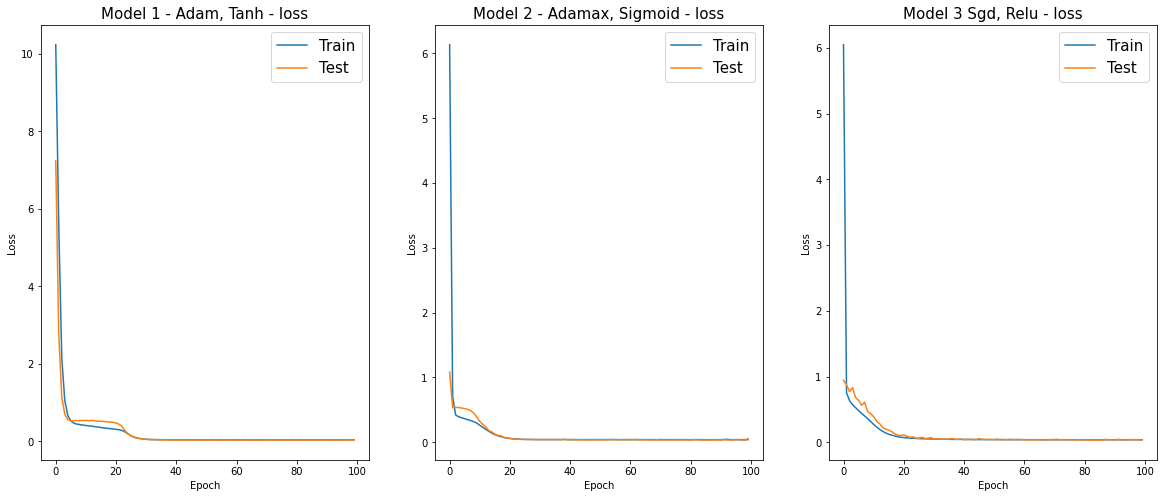

In [175]:
fig , ax = plt.subplots( 1 , 3 , figsize=(20 , 8))

#------------------------------ Model 1:  ADAM, tanh
ax[0].plot(history1.history['loss'])
ax[0].plot(history1.history['val_loss'])
ax[0].set_title('Model 1 - Adam, Tanh - loss', fontsize=15)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best', prop={'size':15})
#------------------------------ Model 2:  ADAMAX, Sigmoid
ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Model 2 - Adamax, Sigmoid - loss', fontsize=15)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best', prop={'size':15})
#------------------------------ Model 3:  SGD, Relu
ax[2].plot(history3.history['loss'])
ax[2].plot(history3.history['val_loss'])
ax[2].set_title('Model 3 Sgd, Relu - loss', fontsize=15)
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')
ax[2].legend(['Train', 'Test'], loc='best', prop={'size':15})

In [176]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = f( x_valid ) 

x_predicted = np.random.uniform(-1.5, 1.5, 500)
y_predicted1 = Model1.predict(x_predicted)
y_predicted2 = Model2.predict(x_predicted)
y_predicted3 = Model3.predict(x_predicted)

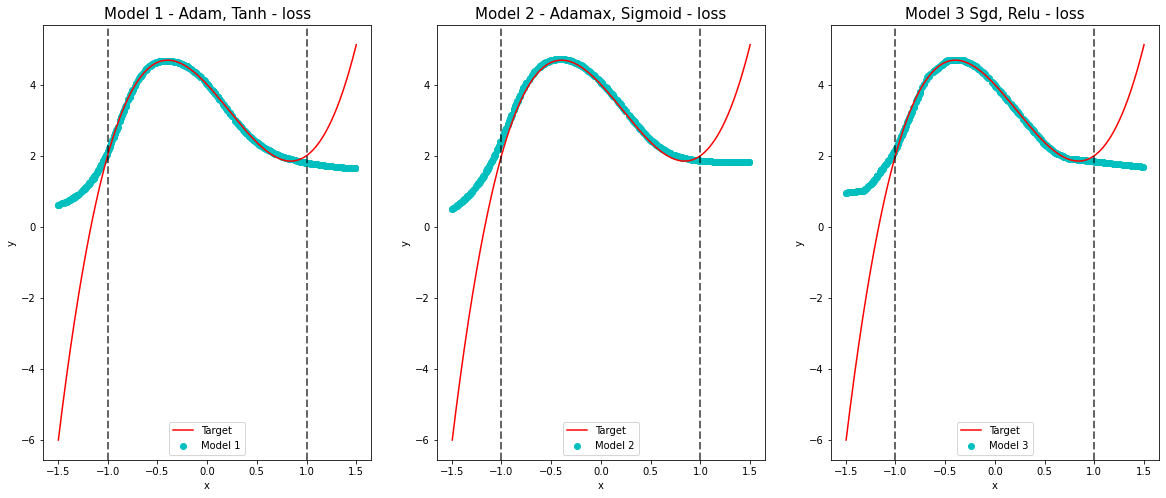

In [177]:
fig , ax = plt.subplots( 1 , 3 , figsize=(20 , 8))

#------------------------------ Model 1:  ADAM, tanh
ax[0].scatter(x_predicted, y_predicted1 ,color='c', label = "Model 1") 
ax[0].plot(x_valid, y_target , color = "r" , label = "Target")
ax[0].set_title('Model 1 - Adam, Tanh - loss', fontsize=15)
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[0].axvline(-1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[0].axvline(1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[0].legend()
#------------------------------ Model 2:  ADAMAX, Sigmoid
ax[1].scatter(x_predicted, y_predicted2 ,color='c' , label = "Model 2")
ax[1].plot(x_valid, y_target , color = "r" , label = "Target")
ax[1].set_title('Model 2 - Adamax, Sigmoid - loss', fontsize=15)
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].axvline(-1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[1].axvline(1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[1].legend()
#------------------------------ Model 3:  SGD, Relu
ax[2].scatter(x_predicted, y_predicted3 ,color='c' , label = "Model 3")
ax[2].plot(x_valid, y_target , color = "r" , label = "Target")
ax[2].set_title('Model 3 Sgd, Relu - loss', fontsize=15)
ax[2].set_ylabel('y')
ax[2].set_xlabel('x')
ax[2].axvline(-1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[2].axvline(1,0,4.5, color='black', linestyle='--', linewidth=2, alpha=0.6)
ax[2].legend()

Optimizers can be explained as a mathematical function to modify the weights of the network given the gradients and additional information, depending on the formulation of the optimizer. Optimizers are built upon the idea of gradient descent, the greedy approach of iteratively decreasing the loss function by following the gradien.

For this study we used 3 different optimizers:

1) **Adam** (Adaptive Moment Estimation): Similar to the momentum optimizer, it conserves a certain amount of momentum to try to get out of holes and not risk getting stuck in a local minimum. Adam makes use of an exponentially decaying average of past gradient in order to calculate the direction of parameter updates.

2) **AdaMax**: while Adam can be understood as updating weights inversely proportional to the scaled $L^2$ norm of past gradients, AdaMax extends this to the so-called infinite norm (max) of past gradients. It automatically adapts a separate step size (learning rate) for each parameter in the optimization problem.

3) **SGD** (Stochastic Gradient Descent): it subtracts the gradient multiplied by the learning rate from the weights.

-------------------------------------------------------------------------------

Comparing the final losses, we conclude that the Adam and AdaMax optimizers, with regard to this regression, behave similarly. 
Adding an initial layer consisting of many neurons to Model 2 does not result in a significant improvement in the regression. So, for simple regressions like this, there is no need to construct overly complex networks with many parameters.

The three models perform equally well, and there are no obvious differences between the different activation functions and between the different optimizers. This similarity of effects is probably due to the simplicity of the problem and the efficiency of the tools used to solve it.

In all three cases, the Mean Squared Error (mse) loss function was used.

Outside the range $[-1,1]$ in which we trained the network, the model **cannot** predict the trend of the polynomial. 

# <span style="color:red"> Exercise 11.3 </span>

Finally, we want to fit the following 2D function

$$g(x,y) = \sin(x^2+y^2)$$

in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [178]:
def g(x,y):
    return np.sin(x**2+y**2)

np.random.seed(0)

x_train = np.random.uniform(-1.5, 1.5, 10000)
y_train = np.random.uniform(-1.5, 1.5, 10000)
x_valid = np.random.uniform(-1.5, 1.5, 1500)
y_valid = np.random.uniform(-1.5, 1.5, 1500)
x_valid.sort()
y_valid.sort()

z_target =  g(x_valid,y_valid)

sigma = 0.2
z_train = np.random.normal(g(x_train,y_train), sigma)
z_valid = np.random.normal(g(x_valid,y_valid), sigma)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0.92, 'Validation and target dataset')

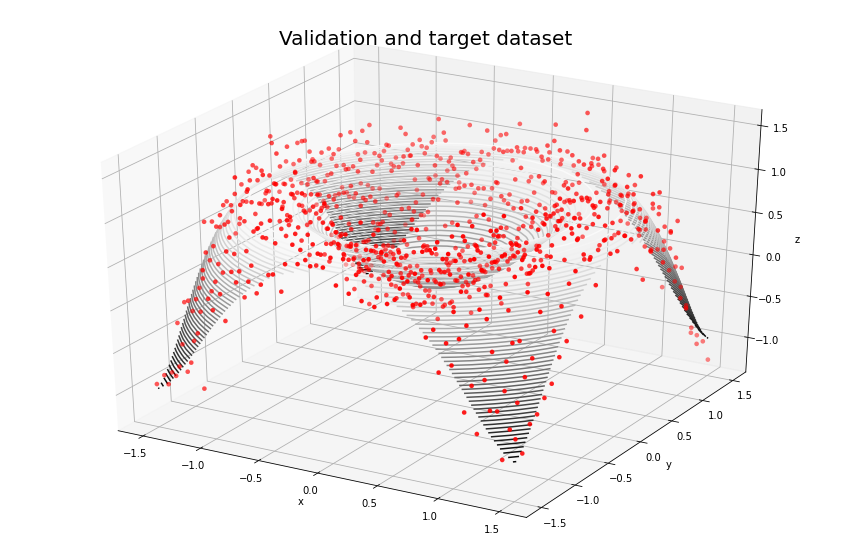

In [179]:
# plot validation and target dataset
fig = plt.figure(figsize= (15 , 10))
ax = plt.axes(projection='3d')
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y)
Z = g(X,Y)

ax.contour3D(X, Y, Z, 50, cmap='gray',label='Target')
X, Y, np.meshgrid(x, y)
Z = np.random.normal(g(X, Y), sigma)
ax.scatter(X, Y, Z, color='r', linewidth=0.1, label='Test data');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Validation and target dataset', fontsize=20)

Since $g(x,y)$ has two variables, we need two inputs in the first layer.

In [180]:
model = tf.keras.Sequential()
model.add( Dense( 200, input_shape=(2,), activation="elu") )
model.add( Dense( 100 , activation="elu" ) )
model.add( Dense( 50, activation="elu") )
model.add( Dense( 1, activation="elu") )
   
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile( loss='mean_squared_error', optimizer=opt , metrics=['mse'] )

In [181]:
history = model.fit(x=np.array([x_train,y_train]).T, y=z_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.array([x_valid, y_valid]).T, z_valid),
          verbose=0)

In [182]:
# evaluate model
score = model.evaluate(np.array([x_valid, y_valid]).T, z_valid, batch_size=32, verbose=0)
# print performance
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.05047956854104996
Test accuracy: 0.05047956854104996


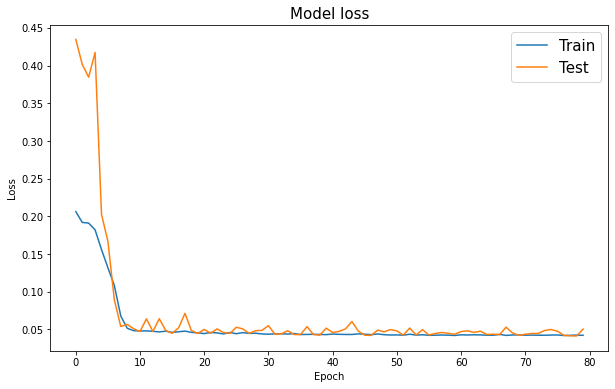

In [183]:
fig , ax = plt.subplots(figsize=(10 , 6))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss', fontsize=15)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best', prop={'size':15})

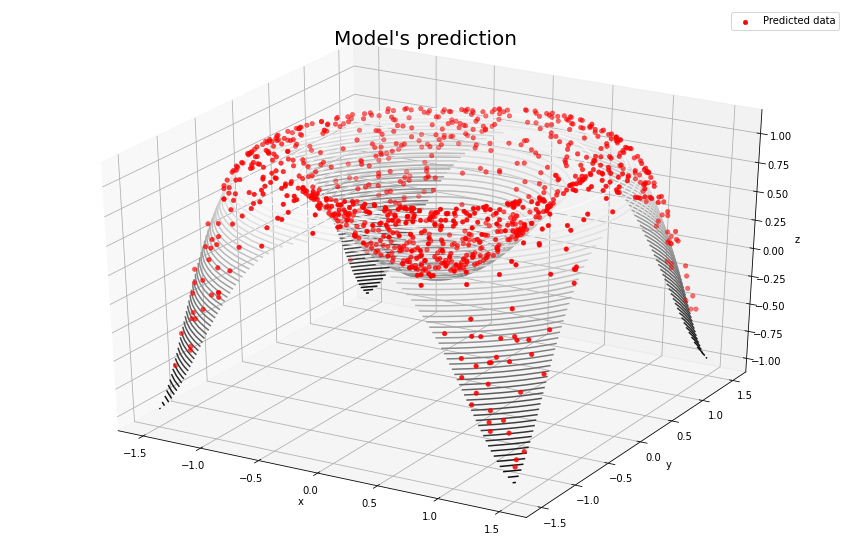

In [184]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='gray')

x_predicted = np.random.uniform(-1.5, 1.5, size=(1000,2))
y_predicted = model.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='r', linewidth=0.5, label='Predicted data')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title( "Model's prediction", fontsize = 20 )
ax.legend()